# Zipf's Law

Zipf's law is based upon an empirical observation about the frequency distribution of the words that occur within a given corpus of documents.

We'll explore this on our own, before stating the "law" at the end. I'll also provide you a link to a paper that explores this "law" in more depth.

In [2]:
## We'll want the following packages

# for data handling
import pandas as pd
import numpy as np

# for nlp tokenizing
from nltk.tokenize import word_tokenize

# for plotting
import matplotlib.pyplot as plt
from seaborn import set_style
# puts a white grid behind your plots
set_style("whitegrid")

Let's look at our Two reviews data sets. The following code is a copy and paste from the NLP Data Folder.

In [4]:
movie_df = pd.read_csv('Movie Review Data Set.csv')
movie_df.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [5]:
food_df = pd.read_csv('Food Review Data Set.csv')
food_df.head(2)

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [6]:
# We'll keep it as lowercase text for simplicity
movie_df['review_lower'] =movie_df.review.str.lower()
food_df['text_lower'] = food_df.Text.str.lower()

In [8]:
words_list = movie_df['review_lower'].tolist()
raw_text = ''.join(words_list)
movie_words = raw_text.split()

In [9]:
words_list = food_df['text_lower'].tolist()
raw_text = ''.join(words_list)
food_words = raw_text.split()

In [10]:
#!pip install nltk

In [11]:
import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Another way to tokenize, is using `word_tokenize`.

In [13]:
movie_df['tokens'] = movie_df['review_lower'].apply(word_tokenize)
food_df['tokens'] = food_df['text_lower'].apply(word_tokenize)

### Your Turn
Okay now you write a function that will take in these tokens and produce a `word` frequency dataframe. The dataframe should contain a word column and a frequency column. Call your dataframes  `Mov_df` and `FOD_df`.

It will likely be easiest to write this as a function that you can apply to both token arrays.

__Note:__ While this may be confusing, don't create the word frequency vector by creating a bag of words basis set. Every entry in your vector should be . Please ask for clarification if this note was confusing.

In [14]:
# make word counts
def word_freq(tokens):
    word_dict = {}

    for word in tokens:
        if word in word_dict.keys():
            word_dict[word] = word_dict[word] + 1
        else:
            word_dict[word] = 1

    df = pd.DataFrame({'word':word_dict.keys(),
                            'times_used':word_dict.values()})

    df['frequency'] = df['times_used']/df.times_used.sum()

    return df[['word','frequency']].sort_values('frequency', ascending=False).reset_index(drop=True)

In [15]:
Mov_df = word_freq(movie_words)
FOD_df = word_freq(food_words)

In [16]:
Mov_df.head()

,word,frequency
0,the,0.055709
1,a,0.027055
2,and,0.026999
3,of,0.025423
4,to,0.022800


In [17]:
FOD_df.head()

,word,frequency
0,the,0.042459
1,and,0.028924
2,i,0.026276
3,a,0.025941
4,to,0.020965


### Producing Ranks for the Words
Now that you have dataframes, run the following code to add a column that ranks the words based on their frequency.

In [18]:
# rank documentation
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html
Mov_df['word_rank'] = Mov_df['frequency'].rank(ascending=False)
FOD_df['word_rank'] = FOD_df['frequency'].rank(ascending=False)

In [19]:
Mov_df.head()

,word,frequency,word_rank
0,the,0.055709,1.0
1,a,0.027055,2.0
2,and,0.026999,3.0
3,of,0.025423,4.0
4,to,0.022800,5.0


In [20]:
FOD_df.head()

,word,frequency,word_rank
0,the,0.042459,1.0
1,and,0.028924,2.0
2,i,0.026276,3.0
3,a,0.025941,4.0
4,to,0.020965,5.0


Now use `matplotlib`'s `scatter` to plot the -transform rank on the -axis and the -transform frequency on the -axis (both base ). Make the Movie Review points blue and the FOD red, and add a legend.

Hint: `np.log10` produces the $\log$-transform of an array.

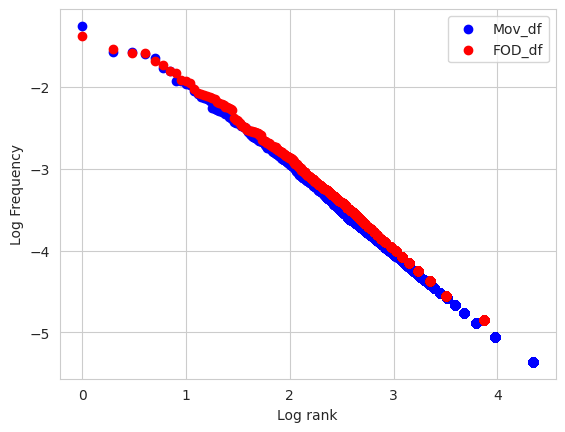

In [24]:
plt.scatter(np.log10(Mov_df['word_rank']), np.log10(Mov_df['frequency']), color='blue', label='Mov_df')
plt.scatter(np.log10(FOD_df['word_rank']), np.log10(FOD_df['frequency']), color='red', label='FOD_df')
plt.xlabel('Log rank')
plt.ylabel('Log Frequency')
plt.legend()
plt.show()
# np.log10(FOD_df['word_rank'])

### Adding a Regression Line
Now let's add a simple linear regression line to the plot you just produced. Running the code chunks below will give you arrays to add with a `plt.plot()` call. Add this line as a black dotted line with `alpha=.7`.

In [25]:
# combines the data into a single array for regression
x = np.log10(np.array(pd.concat([Mov_df['word_rank'], FOD_df['word_rank']])))
y = np.log10(np.array(pd.concat([Mov_df['frequency'], FOD_df['frequency']])))

In [26]:
# import the LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

In [27]:
# make a LinearRegression object
slr = LinearRegression()

# fit the model
slr.fit(x.reshape(-1,1),y.ravel())

# These are the x and y for your regression line
xs_pred = np.linspace(-.1,5,100)
ys_pred = slr.predict(xs_pred.reshape(-1,1))

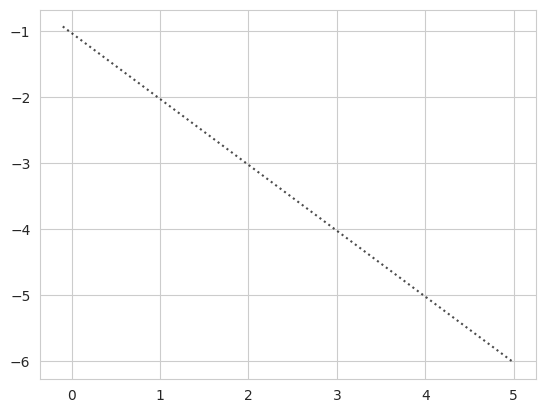

In [28]:
plt.plot(xs_pred, ys_pred, color='black', linestyle='dotted', alpha=.7, label='linear regression')

As we can see the two sets of observations tend to fall along a straight line. This is the idea behind Zipf's Law.

From Wikipedia Zipf's law states that:

_The frequency of any word is inversely proportional to its rank in the frequency table_.

In more mathematical words there is the following observed relationship between the word's rank,$r$ , and the frequency,$f(r)$ :

$$
f(r) \ \ \alpha \ \ \frac{1}{r^{\alpha}}
$$

across the documents within a corpus, meaning the frequency of a word roughly follows a power law of its rank.


### A Note
It's important to note that this is an empirical relationship, not something that has been proven rigorously. As such there are critiques to this that may be interesting to you, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/. But for the most part it seems that this relationship roughly holds.
